In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

df= pd.read_excel("D:\CIT\SEM 5\Human Resources System Developement Lab\EX 4.xlsx")
df.head(6)

<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:8: SyntaxWarning: invalid escape sequence '\C'
C:\Users\DELL\AppData\Local\Temp\ipykernel_556\2614357868.py:8: SyntaxWarning: invalid escape sequence '\C'
  df= pd.read_excel("D:\CIT\SEM 5\Human Resources System Developement Lab\EX 4.xlsx")


,Name,Age,Position,Experience,Email,Contact,1,2,3,4,...,1.4,2.4,3.4,4.4,5.4,1.5,2.5,3.5,4.5,5.5
0,Alex,47,Warehouse manager,1,Alex@gmail.com,5824401063,1,4,2,4,...,3,5,4,4,5,2,5,4,5,4
1,Antony,38,Product manager,15,Antony@gmail.com,2499589757,3,5,4,1,...,5,4,3,4,4,1,1,3,1,5
2,Benjamin,29,Furniture designer,7,Benjamin@gmail.com,3518287941,2,1,3,2,...,3,4,4,3,1,5,3,5,3,4
3,chris,22,Product manager,16,chris@gmail.com,5778468359,3,1,3,1,...,2,2,2,2,5,3,5,2,3,1
4,Carl,20,Warehouse manager,4,Carl@gmail.com,3982851789,1,3,1,3,...,4,4,1,1,5,2,4,3,5,4
5,Canem,42,Product manager,13,Canem@gmail.com,2153490600,5,1,4,1,...,5,2,3,5,1,3,5,3,1,5


In [2]:
data = df.drop(['Name', 'Age', 'Position', 'Experience', 'Email', 'Contact'], axis=1)
data.dtypes
data.isnull().sum()

1      0
2      0
3      0
4      0
5      0
1.1    0
2.1    0
3.1    0
4.1    0
5.1    0
1.2    0
2.2    0
3.2    0
4.2    0
5.2    0
1.3    0
2.3    0
3.3    0
4.3    0
5.3    0
1.4    0
2.4    0
3.4    0
4.4    0
5.4    0
1.5    0
2.5    0
3.5    0
4.5    0
5.5    0
dtype: int64

In [3]:
cor = data.corr()
cor

,1,2,3,4,5,1.1,2.1,3.1,4.1,5.1,...,1.4,2.4,3.4,4.4,5.4,1.5,2.5,3.5,4.5,5.5
1,1.000000,-0.042556,0.292599,0.224047,-0.316864,-0.412821,-0.007817,0.071407,0.154156,0.028847,...,0.299397,-0.329317,-0.012547,0.018800,-0.208260,0.000982,0.069595,-0.124318,-0.334242,-0.276286
2,-0.042556,1.000000,0.157248,0.159750,-0.101939,-0.183128,-0.300958,-0.053392,-0.037885,0.234857,...,-0.190528,0.291638,-0.151430,0.178902,0.189228,-0.113492,-0.314986,-0.389534,0.044706,0.224282
3,0.292599,0.157248,1.000000,-0.115657,-0.163511,-0.096920,0.168810,0.354567,0.078862,-0.028948,...,0.049771,-0.126383,0.045094,0.070070,-0.189092,-0.252973,-0.023841,-0.130319,-0.360276,-0.147480
4,0.224047,0.159750,-0.115657,1.000000,-0.119820,-0.137964,0.036760,0.230695,-0.060412,-0.159471,...,-0.070532,0.000923,0.228659,0.203858,0.148042,0.228809,0.290289,0.013216,0.244518,-0.232615
5,-0.316864,-0.101939,-0.163511,-0.119820,1.000000,-0.014872,-0.228840,0.193363,0.130874,-0.239667,...,0.005350,0.084152,-0.237081,-0.162498,0.155079,0.113991,0.012661,-0.147875,0.260111,0.056810
1.1,-0.412821,-0.183128,-0.096920,-0.137964,-0.014872,1.000000,0.003292,-0.084317,-0.268991,-0.469283,...,0.188351,0.174255,0.260344,0.065703,-0.060411,0.367091,0.108876,0.079477,0.197023,0.035504
2.1,-0.007817,-0.300958,0.168810,0.036760,-0.228840,0.003292,1.000000,-0.062318,-0.410198,0.070685,...,0.359426,0.131153,0.148603,0.028712,-0.150750,-0.099829,0.381390,0.406853,0.182930,-0.185384
3.1,0.071407,-0.053392,0.354567,0.230695,0.193363,-0.084317,-0.062318,1.000000,0.004124,-0.223540,...,-0.191783,0.009870,0.024455,0.079801,0.063818,0.089312,0.109385,0.070675,-0.034783,-0.251310
4.1,0.154156,-0.037885,0.078862,-0.060412,0.130874,-0.268991,-0.410198,0.004124,1.000000,-0.081157,...,-0.331970,-0.292576,-0.178237,-0.137814,-0.011464,-0.014083,-0.223119,-0.222879,-0.166567,-0.184525
5.1,0.028847,0.234857,-0.028948,-0.159471,-0.239667,-0.469283,0.070685,-0.223540,-0.081157,1.000000,...,-0.198321,0.000571,-0.356688,-0.318363,0.215074,-0.250706,-0.433741,-0.212707,-0.037281,0.249976


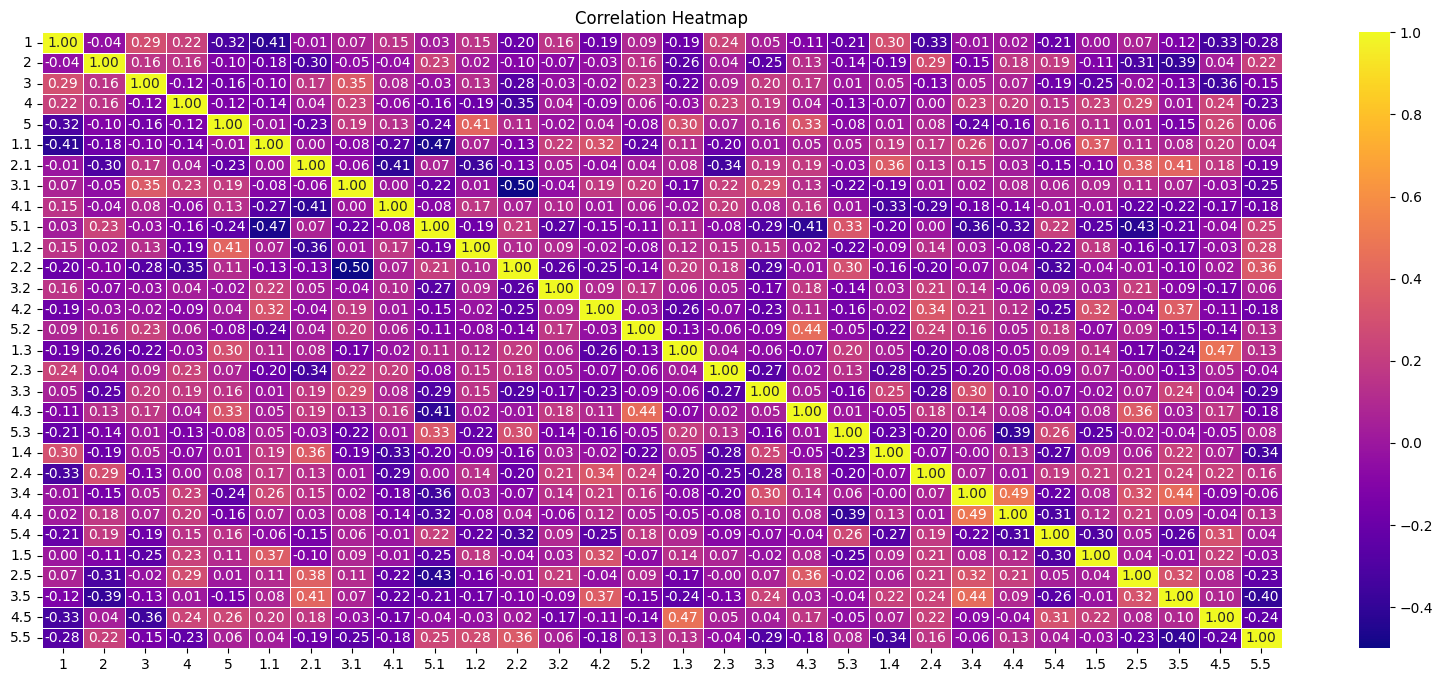

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='plasma', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [5]:
df1=df.iloc[:,5:]
print(df1.head())

      Contact  1  2  3  4  5  1.1  2.1  3.1  4.1  ...  1.4  2.4  3.4  4.4  \
0  5824401063  1  4  2  4  2    4    5    1    2  ...    3    5    4    4   
1  2499589757  3  5  4  1  4    3    2    3    1  ...    5    4    3    4   
2  3518287941  2  1  3  2  5    3    3    4    3  ...    3    4    4    3   
3  5778468359  3  1  3  1  4    3    1    4    5  ...    2    2    2    2   
4  3982851789  1  3  1  3  5    2    5    2    2  ...    4    4    1    1   

   5.4  1.5  2.5  3.5  4.5  5.5  
0    5    2    5    4    5    4  
1    4    1    1    3    1    5  
2    1    5    3    5    3    4  
3    5    3    5    2    3    1  
4    5    2    4    3    5    4  

[5 rows x 31 columns]


In [6]:
from sklearn.preprocessing import StandardScaler
fnames=['Working Conditions','Relationship with Colleagues','Job Satisfaction','Companys Policies','Work Life Balance','Support by top management '] 
f_dict=dict()
for i in range(0,6):
    f_dict[fnames[i]]=df1.iloc[:,4*i+1:4*i+5].sum(axis=1)
fac_df=pd.DataFrame(f_dict)
print(fac_df.head())

   Working Conditions  Relationship with Colleagues  Job Satisfaction  \
0                  11                            12                11   
1                  13                            12                 8   
2                   8                            15                14   
3                   8                            12                11   
4                   8                            14                11   

   Companys Policies  Work Life Balance  Support by top management   
0                 10                 13                          16  
1                 16                  6                          16  
2                 16                 17                          14  
3                 13                 14                           8  
4                  9                 12                          10  


In [7]:
fac_df["Score"] = fac_df.iloc[:, 0:6].sum(axis=1)
mean = int(fac_df["Score"].mean())  # Corrected this line
fac_df.loc[fac_df['Score'] >= mean, 'Satisfaction'] = 'High'
fac_df.loc[fac_df['Score'] < mean, 'Satisfaction'] = 'Low'
print(fac_df.head(10))
count = fac_df["Satisfaction"].value_counts()
print(count)

   Working Conditions  Relationship with Colleagues  Job Satisfaction  \
0                  11                            12                11   
1                  13                            12                 8   
2                   8                            15                14   
3                   8                            12                11   
4                   8                            14                11   
5                  11                             9                13   
6                  12                             9                15   
7                  11                             8                18   
8                   9                            12                16   
9                   9                            10                14   

   Companys Policies  Work Life Balance  Support by top management   Score  \
0                 10                 13                          16     73   
1                 16                  6 

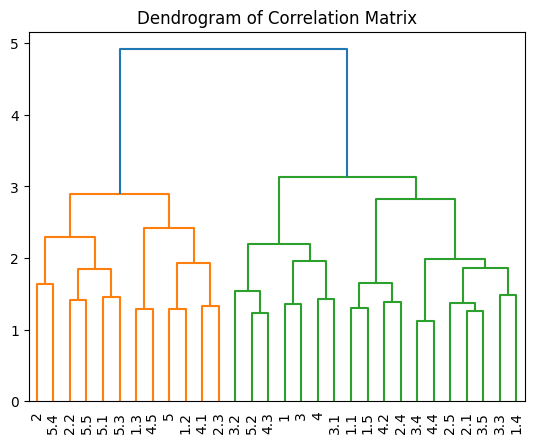

In [8]:
linkage=hierarchy.linkage(cor,method='ward')
dendo=hierarchy.dendrogram(linkage,labels=cor.columns,orientation='top')
plt.xticks(rotation=90)
plt.title("Dendrogram of Correlation Matrix")
plt.show()

In [9]:
fac_df1=df[['Name', 'Age', 'Experience']].join(fac_df)
fac_df1['Experience'].groupby(fac_df1['Satisfaction']).max()

Satisfaction
High    19
Low     18
Name: Experience, dtype: int64

In [10]:
age_stats = fac_df1.groupby('Satisfaction')['Age'].agg(['mean', 'std'])
print("\nAge Statistics for High and Low Satisfaction Groups:")
print(age_stats)


Age Statistics for High and Low Satisfaction Groups:
              mean        std
Satisfaction                 
High          36.5  11.208549
Low           44.0  15.858752


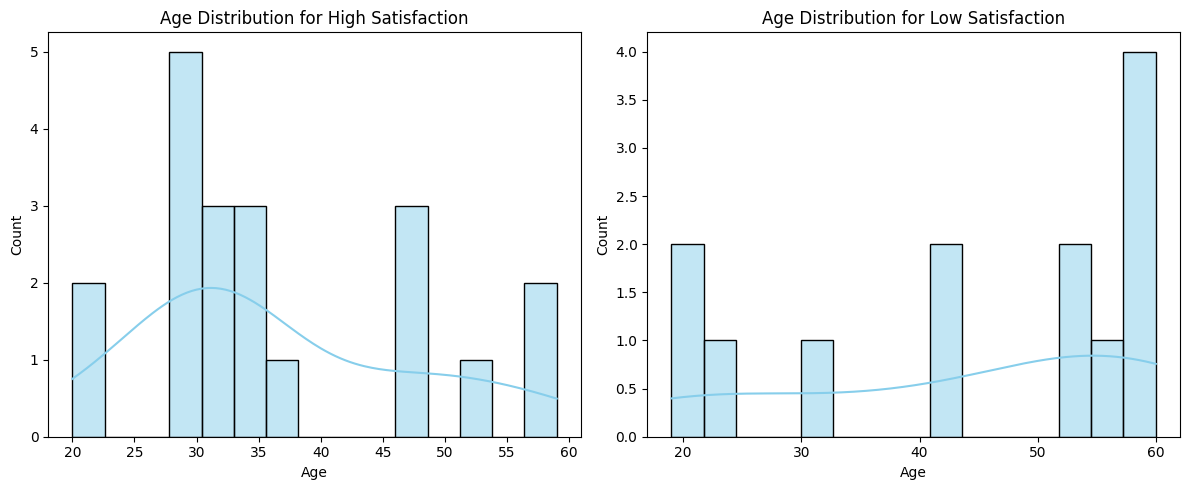

In [11]:
import seaborn as sb
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, satisfaction_group in enumerate(fac_df['Satisfaction'].unique()):
    data = fac_df1[fac_df1['Satisfaction'] == satisfaction_group]['Age']
    sb.histplot(data, bins=15, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Age Distribution for {satisfaction_group} Satisfaction')
    axes[i].set_xlabel('Age')

plt.tight_layout()
plt.show()
